Question 35
---

Precision means the number of correctly recommended items divides by all the recommended items;

Recall means the number of correctly recommended items divides by all the items that user likes.

Question 36
---

Load the data

In [5]:
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
import matplotlib.pyplot as plt
import numpy as np

file_path = os.path.expanduser('../ml-latest-small/ratings.csv')
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file(file_path, reader = reader)

Using the following codes to do the k-NN collaborative filter predictions, the k is set to 22 as in the Question 11

In [24]:
# input tup is the list of (item, r_ui, est)
# return precision and recall
def get_precision_recall(tup, t):
    threshold = 3
    G = set([tmp[0] for tmp in filter(lambda x: x[1] >= threshold, tup)])
    if len(G) == 0:
        return False, 0, 0
    tup = sorted(tup, lambda x, y: int(y[2] - x[2]))
    S = set([x[0] for x in tup[: t]])
    inter = G & S
    precision = float(len(inter)) / len(S)
    recall = float(len(inter)) / len(G)
    return True, precision, recall

In [26]:
from surprise.model_selection import KFold
from surprise import accuracy

def get_result(algo):
    
    n_splits = 10
    kf = KFold(n_splits = n_splits)
    ts = range(1, 26)
    
    precision_to_t = []
    recall_to_t = []
    
    for t in ts:
        precision_list = []
        recall_list = []

        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            prediction = algo.test(testset)
            content = dict() # key is the user id, and the value is the list of (item, r_ui, est)
            for (user, item, r_ui, est, valid) in prediction:
                if 'reason' in valid: # meaning this item is not valid
                    continue
                tup = (item, r_ui, est)
                if user in content:
                    content[user].append(tup)
                else:
                    content[user] = [tup]   

            count = 0
            total_pre = 0
            total_rec = 0

            # for every pair in the content, determine whether the number of items is less than t. If it is, then drop it
            # else calculate the precision and recall
            for key in content:
                if len(content[key]) >= t:
                    flag, precision, recall = get_precision_recall(content[key], t)
                    if not flag: 
                        continue
                    count += 1
                    total_pre += precision
                    total_rec += recall

            precision_list.append(total_pre / count)
            recall_list.append(total_rec / count)

        # thus the final result should be the average of the k-fold
        precision_to_t.append(sum(precision_list) / n_splits)
        recall_to_t.append(sum(recall_list) / n_splits)
        
    return precision_to_t, recall_to_t

In [27]:
k = 22
sim_options = {'name': 'pearson'}
algo = KNNWithMeans(k, sim_options = sim_options)

precision, recall = get_result(algo)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

And the result can be shown as follows:

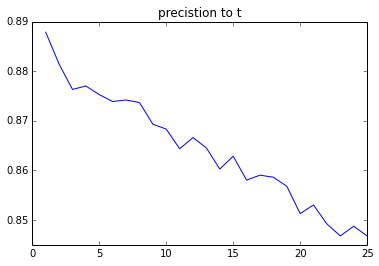

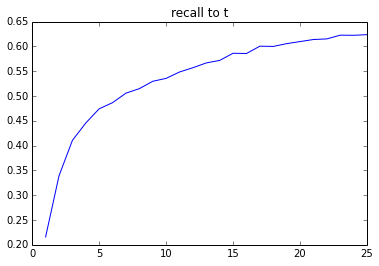

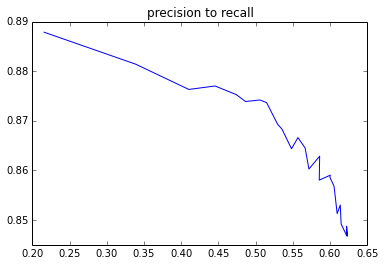

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ts = range(1, 26)

plt.plot(ts, precision)
plt.title("precistion to t")
plt.show()

plt.plot(ts, recall)
plt.title("recall to t")
plt.show()

plt.plot(recall, precision)
plt.title("precision to recall")
plt.show()

Question 37
---

And the optimal number of latent factors is 18, thus the 

In [38]:
from surprise.prediction_algorithms.matrix_factorization import NMF
k = 18
algo = NMF(k)

precision, recall = get_result(algo)

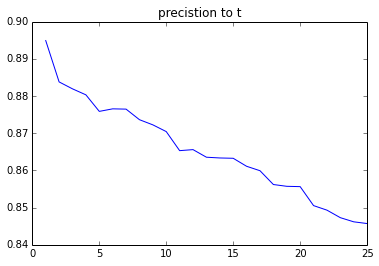

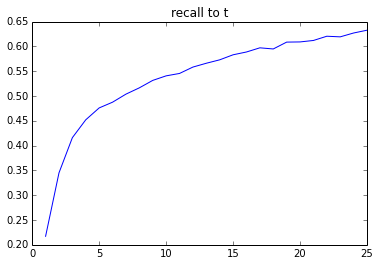

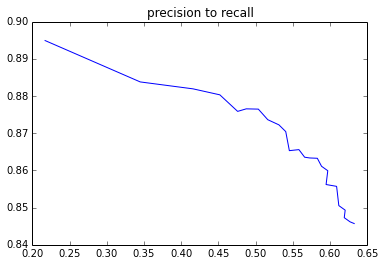

In [39]:
plt.plot(ts, precision)
plt.title("precistion to t")
plt.show()

plt.plot(ts, recall)
plt.title("recall to t")
plt.show()

plt.plot(recall, precision)
plt.title("precision to recall")
plt.show()

Question 38
---

In [40]:
from surprise.prediction_algorithms.matrix_factorization import SVD

k = 22
algo = SVD(k)
precision, recall = get_result(algo)

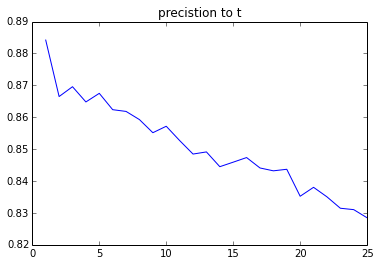

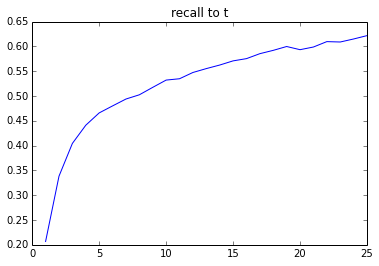

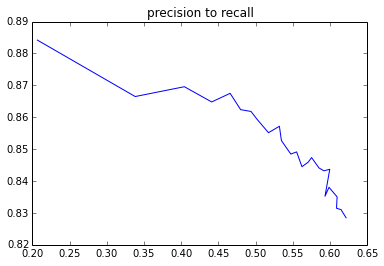

In [41]:
plt.plot(ts, precision)
plt.title("precistion to t")
plt.show()

plt.plot(ts, recall)
plt.title("recall to t")
plt.show()

plt.plot(recall, precision)
plt.title("precision to recall")
plt.show()